<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_12_Multiplevariate_Time_Series_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import Parameter

In [ ]:
df = pd.read_excel("/content/COAL_Data.xlsx")
df.head()

,month,coal_price,china_import_from_indonesia,indonesia_production,china_production
0,2012-01-01,39.55,NaN,NaN,1.811865e+08
1,2012-02-01,39.54,NaN,NaN,2.091627e+08
2,2012-03-01,37.76,NaN,NaN,2.444823e+08
3,2012-04-01,42.40,NaN,NaN,2.638101e+08
4,2012-05-01,42.06,NaN,NaN,2.701020e+08


In [ ]:
df.isna().sum()

month                           0
coal_price                      0
china_import_from_indonesia    14
indonesia_production           38
china_production                0
dtype: int64

In [ ]:
data = df[37:-2]
data.isna().sum()

month                          0
coal_price                     0
china_import_from_indonesia    0
indonesia_production           0
china_production               0
dtype: int64

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Time Series Univariate
# ARIMA --> Autoregressive Intergrated Moving Average (Tidak bisa handle data dengan seasonality pattern)
# SARIMA --> Seasonal Autoregressive Integrated Moving Average(Handle data dengan seasonality pattern)

# Time Series Multivariate
# ARIMA --> ARIMA with Exogenous Variables(Tidak bisa handle data dengan seasonality pattern)
# SARIMAX --> SARIMA with Exogenous variables(Handle data dengan seaonality patter)

In [ ]:
# Data : Februari 2015 - Oktober 2022

# Training Feb 2015 - Dec 2021 [83 baris data]
train = data.iloc[:-10]
# Testing jan 2022 - Okt 2022 [10 baris data]
test = data.iloc[-10:]

In [ ]:
model_sarimax = SARIMAX(train["coal_price"], exog = train [["china_import_from_indonesia",
                                                             "indonesia_production",
                                                             "china_production"]],
                                                             order = (0, 1, 0), seasonal_order = (0, 1, 0, 12)) # 12 karena data bulanan jadi 1 tahun = 12 bulan

model_arimax = SARIMAX(train["coal_price"],
                       exog = train [["china_import_from_indonesia",
                                                             "indonesia_production",
                                                             "china_production"]],
                                                             order = (0, 1, 0), seasonal_order = (0, 0, 0, 0)) # 12 karena data bulanan jadi 1 tahun = 12 bukan # Jika seasonal (0,0,0,0) maka akan menjadi ARIMA

In [ ]:
result_sarimax = model_sarimax.fit()
result_arimax = model_arimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions_sarimax = result_sarimax.predict(start = start,
                                             end = end,
                                             exog = test[["china_import_from_indonesia",
                                                             "indonesia_production",
                                                             "china_production"]])

predictions_arimax = result_arimax.predict(start = start,
                                           end = end,
                                           exog = test[["china_import_from_indonesia",
                                                             "indonesia_production",
                                                             "china_production"]])

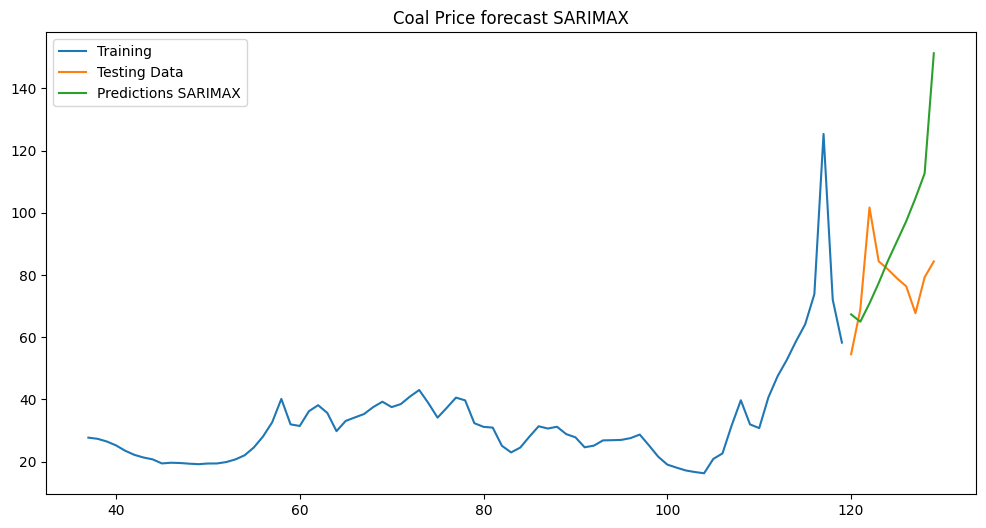

In [ ]:
# Plot SARIMAX

plt.figure(figsize=(12, 6))
plt.plot(train["coal_price"], label = "Training")
plt.plot(test["coal_price"], label = "Testing Data")
plt.plot(predictions_sarimax, label = "Predictions SARIMAX")

plt.legend()
plt.title("Coal Price forecast SARIMAX")
plt.show()

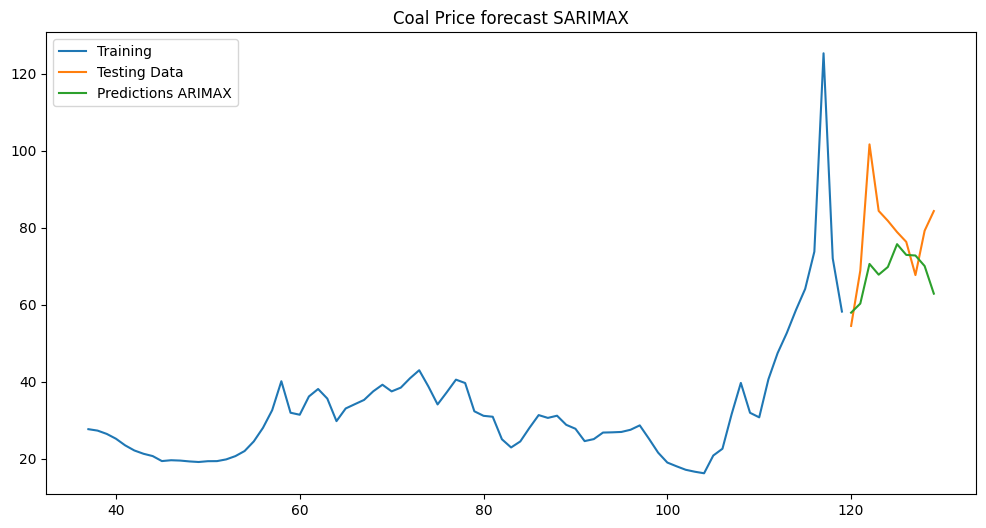

In [ ]:
# Plot ARIMAX

plt.figure(figsize=(12, 6))
plt.plot(train["coal_price"], label = "Training")
plt.plot(test["coal_price"], label = "Testing Data")
plt.plot(predictions_arimax, label = "Predictions ARIMAX")

plt.legend()
plt.title("Coal Price forecast SARIMAX")
plt.show()

# Hyperparameter Tuning

In [ ]:
# Grid Search
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q)) # Membuat semua kombinasi yang berbeda
seasonal_pdq = [(x[0], x[1], x[2], 12)for x in pdq]

In [ ]:
aic = float("inf") # AIC = Metric evaluasi model

for parameter in pdq:
  for parameter_seasonal in seasonal_pdq:
    try:
      model = SARIMAX(train["coal_price"], exog = train [["china_import_from_indonesia",
                                                             "indonesia_production",
                                                             "china_production"]],
                                                             order = parameter, seasonal_order = parameter_seasonal)

      result = model.fit()

      if result.aic < aic:
        aic = result.aic
        best_order = parameter
        best_seasonal_order = parameter_seasonal

    except:
      continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxim

In [ ]:
print("Best SARIMAX Parameter : Order = {}, Seasonal Order = {}".format(best_order, best_seasonal_order))

Best SARIMAX Parameter : Order = (0, 1, 0), Seasonal Order = (1, 2, 0, 12)
